In [34]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# 'observation.db' holds both Postgres and MySQL observations.
conn = sqlite3.connect('observation.db')

# These contain the start + end times for both MySQL and Postgres.
log_columns_mysql = ['id', 'start_time', 'end_time', 'time_delta', 'workload', 'concurrency', 'mpl', 'iso', 'avg_insertion', 'avg_selection','avg_transaction','avg_latency', 'lock_latency']
log_columns_postgres = ['id', 'start_time', 'end_time', 'time_delta', 'workload', 'concurrency', 'mpl', 'iso', 'avg_insertion', 'avg_selection','avg_transaction','transactions_committed', 'locks']
mysql_log = pd.read_csv('mysql-log.csv', names=log_columns_mysql)
postgres_log = pd.read_csv('postgres-log.csv', names=log_columns_postgres)

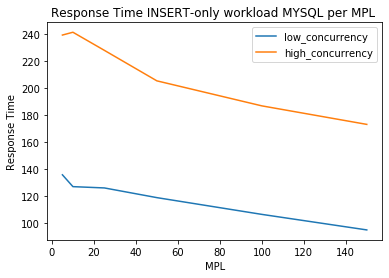

In [3]:
# Response time of INSERT-only workload MySQL as a function of MPL.

mpls_low = mysql_log.query('workload == "i" and concurrency == "low"')['mpl']
mpls_high = mysql_log.query('workload == "i" and concurrency == "high"')['mpl']
mysql_response_time_low = mysql_log.query('workload == "i" and concurrency == "low"')['time_delta']
mysql_response_time_high = mysql_log.query('workload == "i" and concurrency == "high"')['time_delta']

low_concurrency,  = plt.plot(mpls_low, mysql_response_time_low)
high_concurrency, = plt.plot(mpls_high, mysql_response_time_high)

plt.title("Response Time INSERT-only workload MYSQL per MPL ")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Response Time")

plt.legend([ low_concurrency, high_concurrency],[ "low_concurrency","high_concurrency"])
plt.savefig("fig_INSERT_ONLY_MYSQL.png")

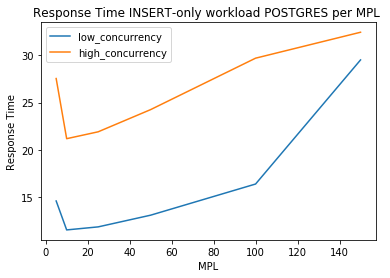

In [4]:
# Response time of INSERT-only workload postgres as a function of MPL.

mpls_low = postgres_log.query('workload == "i" and concurrency == "low"')['mpl']
mpls_high = postgres_log.query('workload == "i" and concurrency == "high"')['mpl']
postgres_response_time_low = postgres_log.query('workload == "i" and concurrency == "low"')['time_delta']
postgres_response_time_high = postgres_log.query('workload == "i" and concurrency == "high"')['time_delta']

low_concurrency,  = plt.plot(mpls_low, postgres_response_time_low)
high_concurrency, = plt.plot(mpls_high, postgres_response_time_high)

plt.title("Response Time INSERT-only workload POSTGRES per MPL ")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Response Time")

plt.legend([ low_concurrency, high_concurrency],[ "low_concurrency","high_concurrency"])
plt.savefig("fig_INSERT_ONLY_POSTGRES.png")

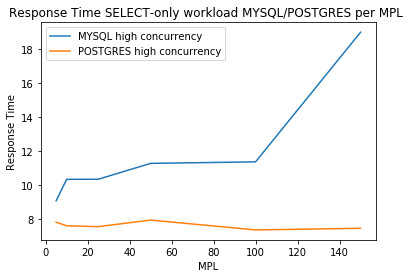

In [5]:
# Response time of SELECT-only workload MySQL/POSTGRES as a function of MPL. (high concurrency)

#mpls_low = mysql_log.query('workload == "q" and concurrency == "low"')['mpl']
mpls_high_mysql = mysql_log.query('workload == "q" and concurrency == "high"')['mpl']
mpls_high_postgres = postgres_log.query('workload == "q" and concurrency == "high"')['mpl']
#mysql_response_time_low = mysql_log.query('workload == "q" and concurrency == "low"')['time_delta']
mysql_response_time_high = mysql_log.query('workload == "q" and concurrency == "high"')['time_delta']
postgres_response_time_high = postgres_log.query('workload == "q" and concurrency == "high"')['time_delta']

#low_concurrency,  = plt.plot(mpls_low, mysql_response_time_low)
mysql_high_concurrency, = plt.plot(mpls_high_mysql, mysql_response_time_high)
postgres_high_concurrency, = plt.plot(mpls_high_mysql, postgres_response_time_high)

plt.title("Response Time SELECT-only workload MYSQL/POSTGRES per MPL ")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Response Time")

#plt.legend([ low_concurrency, high_concurrency],[ "low_concurrency","high_concurrency"])
plt.legend([ mysql_high_concurrency, postgres_high_concurrency],[ "MYSQL high concurrency", "POSTGRES high concurrency"])
plt.savefig("fig_SELECT_ONLY_MYSQL_POSTGRES_high_concurrency.png")


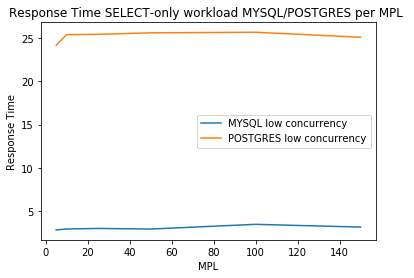

In [6]:
mpls_low_mysql = mysql_log.query('workload == "q" and concurrency == "low"')['mpl']
mpls_low_postgres = postgres_log.query('workload == "q" and concurrency == "low"')['mpl']
#mysql_response_time_low = mysql_log.query('workload == "q" and concurrency == "low"')['time_delta']

mysql_response_time_low = mysql_log.query('workload == "q" and concurrency == "low"')['time_delta']
postgres_response_time_low = postgres_log.query('workload == "q" and concurrency == "low"')['time_delta']

#low_concurrency,  = plt.plot(mpls_low, mysql_response_time_low)
mysql_low_concurrency, = plt.plot(mpls_low_mysql, mysql_response_time_low)
postgres_low_concurrency, = plt.plot(mpls_low_postgres, postgres_response_time_low)

plt.title("Response Time SELECT-only workload MYSQL/POSTGRES per MPL ")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Response Time")

#plt.legend([ low_concurrency, high_concurrency],[ "low_concurrency","high_concurrency"])
plt.legend([ mysql_low_concurrency, postgres_low_concurrency],[ "MYSQL low concurrency", "POSTGRES low concurrency"])
plt.savefig("fig_SELECT_ONLY_MYSQL_POSTGRES_low_concurrency.png")


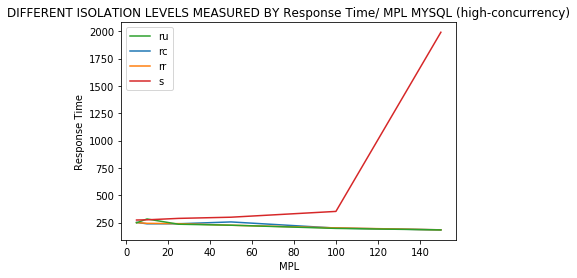

<Figure size 432x288 with 0 Axes>

In [7]:
# Response time of complete workload for MySQL w/ different isolation levels. (high concurrency)

#ru, rr, rc, s


#rc
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['time_delta']
rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")


#rr
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['time_delta']
rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")

#ru
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['time_delta']
ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")

#rs
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['time_delta']
rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")


plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])

plt.title("DIFFERENT ISOLATION LEVELS MEASURED BY Response Time/ MPL MYSQL (high-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Response Time")



plt.show()

plt.savefig("fig_MIXED_ALL_ISO_high_concurrency_MYSQL.png")



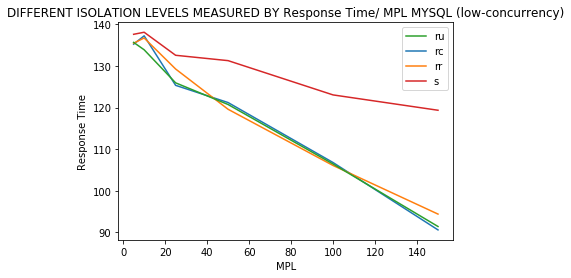

<Figure size 432x288 with 0 Axes>

In [8]:
# Response time of complete workload for MySQL w/ different isolation levels. (low concurrency)

#ru, rr, rc, s


#rc
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['time_delta']
rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")


#rr
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['time_delta']
rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")

#ru
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['time_delta']
ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")

#rs
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "s"')['time_delta']
rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")


plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])

plt.title("DIFFERENT ISOLATION LEVELS MEASURED BY Response Time/ MPL MYSQL (low-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Response Time")



plt.show()

plt.savefig("fig_MIXED_ALL_ISO_low_concurrency_MYSQL.png")



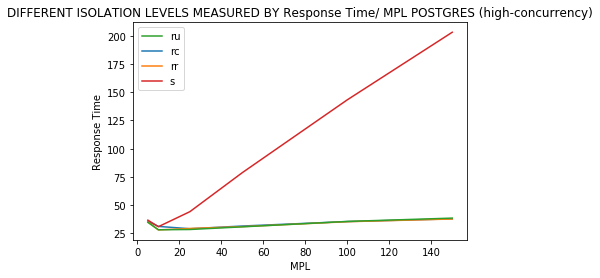

<Figure size 432x288 with 0 Axes>

In [10]:
# Response time of complete workload for POSTGRES w/ different isolation levels. (high concurrency)

#ru, rr, rc, s


#rc
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['time_delta']
rc_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rc")


#rr
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['time_delta']
rr_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rr")

#ru
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['time_delta']
ru_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "ru")

#rs
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['time_delta']
rs_plot_postgres, =plt.plot(mpls, postgres_response_time , label = "s")


plt.legend([ru_plot_postgres, rc_plot_postgres, rr_plot_postgres, rs_plot_postgres],["ru", "rc", "rr", "s"])

plt.title("DIFFERENT ISOLATION LEVELS MEASURED BY Response Time/ MPL POSTGRES (high-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Response Time")



plt.show()

plt.savefig("fig_MIXED_ALL_ISO_high_concurrency_POSTGRES.png")


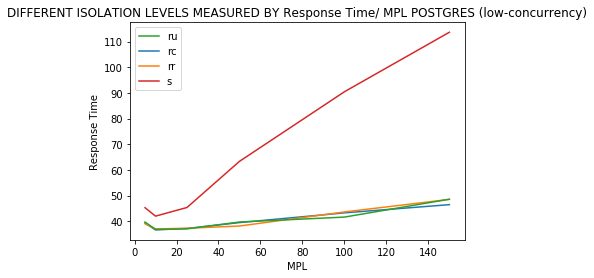

<Figure size 432x288 with 0 Axes>

In [11]:
# Response time of complete workload for POSTGRES w/ different isolation levels. (low concurrency)

#ru, rr, rc, s


#rc
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['time_delta']
rc_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rc")


#rr
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['time_delta']
rr_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rr")

#ru
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['time_delta']
ru_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "ru")

#rs
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "s"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "s"')['time_delta']
rs_plot_postgres, =plt.plot(mpls, postgres_response_time , label = "s")


plt.legend([ru_plot_postgres, rc_plot_postgres, rr_plot_postgres, rs_plot_postgres],["ru", "rc", "rr", "s"])

plt.title("DIFFERENT ISOLATION LEVELS MEASURED BY Response Time/ MPL POSTGRES (low-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Response Time")



plt.show()

plt.savefig("fig_MIXED_ALL_ISO_low_concurrency_POSTGRES.png")


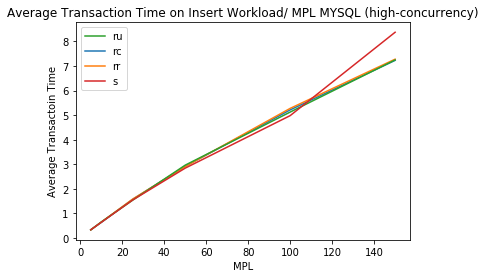

<Figure size 432x288 with 0 Axes>

In [16]:
# Average Transaction time of INSERT-only workload MySQL as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = mysql_log.query('workload == "i" and concurrency == "high" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['avg_insertion']
rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")


#rr
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['avg_insertion']
rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")

#ru
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['avg_insertion']
ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")

#rs
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['avg_insertion']
rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")


plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on Insert Workload/ MPL MYSQL (high-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_INSERT_MYSQL.png")
                                                                                                   


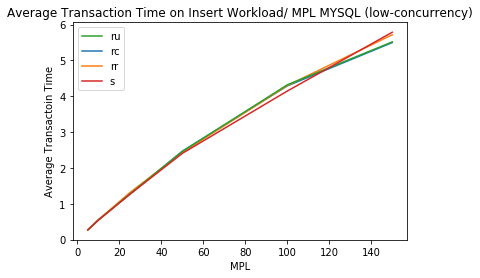

<Figure size 432x288 with 0 Axes>

In [17]:
# Average Transaction time of INSERT-only workload MySQL as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = mysql_log.query('workload == "i" and concurrency == "low" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['avg_insertion']
rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")


#rr
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['avg_insertion']
rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")

#ru
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['avg_insertion']
ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")

#rs
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "s"')['avg_insertion']
rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")


plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on Insert Workload/ MPL MYSQL (low-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_INSERT_MYSQL_lc.png")
                                                                                                   


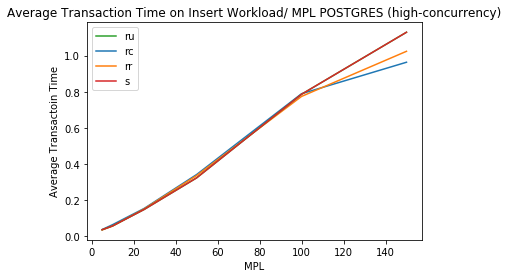

<Figure size 432x288 with 0 Axes>

In [18]:
# Average Transaction time of INSERT-only workload POSTGRES as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = postgres_log.query('workload == "i" and concurrency == "high" and iso == "rc"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['avg_insertion']
rc_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rc")


#rr
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['avg_insertion']
rr_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rr")

#ru
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['avg_insertion']
ru_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "ru")

#rs
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
mysql_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['avg_insertion']
rs_plot_postgres, =plt.plot(mpls, postgres_response_time , label = "s")


plt.legend([ru_plot_postgres, rc_plot_postgres, rr_plot_postgres, rs_plot_postgres],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on Insert Workload/ MPL POSTGRES (high-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_INSERT_POSTGRES_hc.png")
                                                                                                   


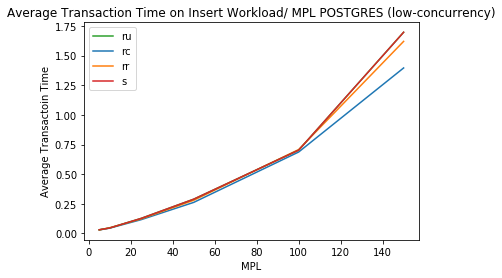

<Figure size 432x288 with 0 Axes>

In [22]:
# Average Transaction time of INSERT-only workload POSTGRES as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = postgres_log.query('workload == "i" and concurrency == "low" and iso == "rc"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['avg_insertion']
rc_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rc")


#rr
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['avg_insertion']
rr_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rr")

#ru
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['avg_insertion']
ru_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "ru")

#rs
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "s"')['mpl']
mysql_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "s"')['avg_insertion']
rs_plot_postgres, =plt.plot(mpls, postgres_response_time , label = "s")


plt.legend([ru_plot_postgres, rc_plot_postgres, rr_plot_postgres, rs_plot_postgres],[ "ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on Insert Workload/ MPL POSTGRES (low-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_INSERT_POSTGRES_lc.png")
                                                                

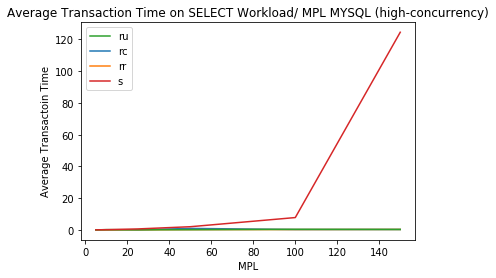

<Figure size 432x288 with 0 Axes>

In [23]:
# Average Transaction time of SELECT-only workload MySQL as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = mysql_log.query('workload == "i" and concurrency == "high" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['avg_selection']
rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")


#rr
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['avg_selection']
rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")

#ru
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['avg_selection']
ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")

#rs
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['avg_selection']
rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")


plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on SELECT Workload/ MPL MYSQL (high-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_SELECT_MYSQL_hc.png")
                                                                                                   


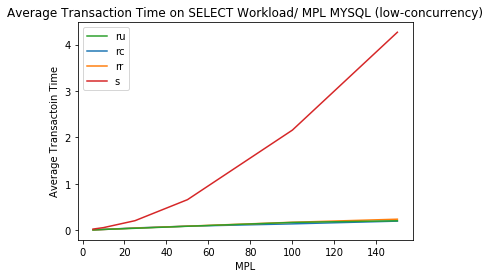

<Figure size 432x288 with 0 Axes>

In [24]:
# Average Transaction time of SELECT-only workload MySQL as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = mysql_log.query('workload == "i" and concurrency == "low" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['avg_selection']
rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")


#rr
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['avg_selection']
rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")

#ru
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['avg_selection']
ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")

#rs
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "s"')['avg_selection']
rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")


plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on SELECT Workload/ MPL MYSQL (low-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_SELECT_MYSQL_lc.png")
                                                                                                   


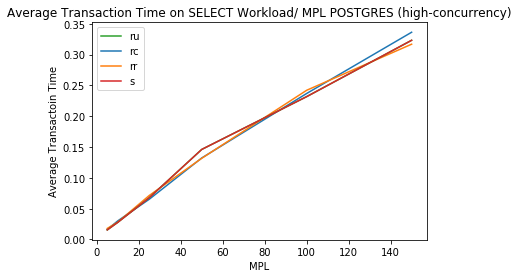

<Figure size 432x288 with 0 Axes>

In [25]:
# Average Transaction time of SELECT-only workload POSTGRES as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = postgres_log.query('workload == "i" and concurrency == "high" and iso == "rc"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['avg_selection']
rc_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rc")


#rr
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['avg_selection']
rr_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rr")

#ru
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['avg_selection']
ru_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "ru")

#rs
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
mysql_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['avg_selection']
rs_plot_postgres, =plt.plot(mpls, postgres_response_time , label = "s")


plt.legend([ru_plot_postgres, rc_plot_postgres, rr_plot_postgres, rs_plot_postgres],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on SELECT Workload/ MPL POSTGRES (high-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_SELECT_POSTGRES_hc.png")
                                                                                                   


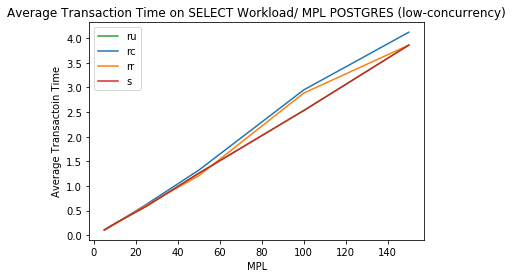

<Figure size 432x288 with 0 Axes>

In [26]:
# Average Transaction time of SELECT-only workload POSTGRES as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = postgres_log.query('workload == "i" and concurrency == "low" and iso == "rc"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['avg_selection']
rc_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rc")


#rr
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['avg_selection']
rr_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rr")

#ru
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['avg_selection']
ru_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "ru")

#rs
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "s"')['mpl']
mysql_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "s"')['avg_selection']
rs_plot_postgres, =plt.plot(mpls, postgres_response_time , label = "s")


plt.legend([ru_plot_postgres, rc_plot_postgres, rr_plot_postgres, rs_plot_postgres],[ "ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on SELECT Workload/ MPL POSTGRES (low-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_SELECT_POSTGRES_lc.png")
                                                                

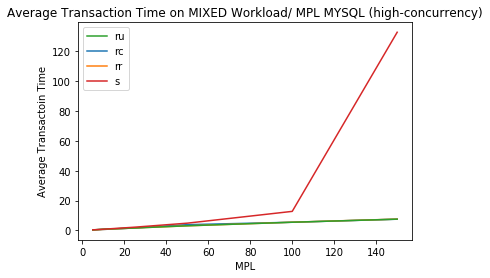

<Figure size 432x288 with 0 Axes>

In [27]:
# Average Transaction time of MIXED workload MySQL as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = mysql_log.query('workload == "i" and concurrency == "high" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['avg_transaction']
rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")


#rr
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['avg_transaction']
rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")

#ru
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['avg_transaction']
ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")

#rs
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['avg_transaction']
rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")


plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on MIXED Workload/ MPL MYSQL (high-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_MIXED_MYSQL_hc.png")
                                                                                                   


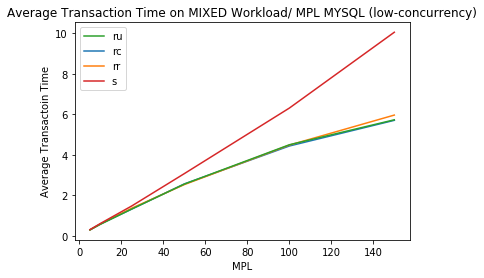

<Figure size 432x288 with 0 Axes>

In [28]:
# Average Transaction time of MIXED-only workload MySQL as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = mysql_log.query('workload == "i" and concurrency == "low" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['avg_transaction']
rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")


#rr
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['avg_transaction']
rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")

#ru
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['avg_transaction']
ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")

#rs
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "s"')['avg_transaction']
rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")


plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on MIXED Workload/ MPL MYSQL (low-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_MIXED_MYSQL_lc.png")
                                                                                                   


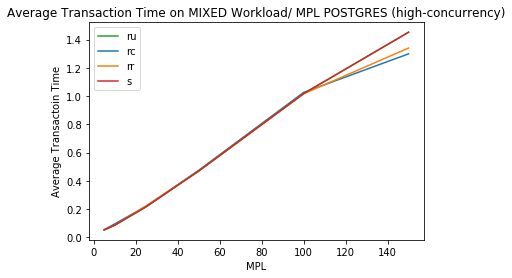

<Figure size 432x288 with 0 Axes>

In [29]:
# Average Transaction time of MIXED-only workload POSTGRES as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = postgres_log.query('workload == "i" and concurrency == "high" and iso == "rc"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['avg_transaction']
rc_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rc")


#rr
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['avg_transaction']
rr_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rr")

#ru
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['avg_transaction']
ru_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "ru")

#rs
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
mysql_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['avg_transaction']
rs_plot_postgres, =plt.plot(mpls, postgres_response_time , label = "s")


plt.legend([ru_plot_postgres, rc_plot_postgres, rr_plot_postgres, rs_plot_postgres],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on MIXED Workload/ MPL POSTGRES (high-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_MIXED_POSTGRES_hc.png")
                                                                                                   


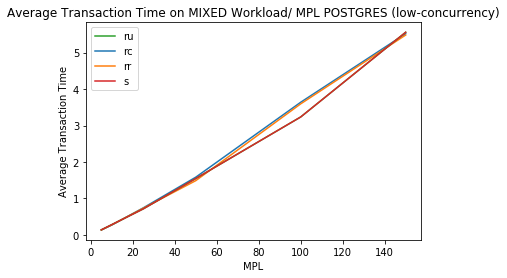

<Figure size 432x288 with 0 Axes>

In [30]:
# Average Transaction time of MIXED-only workload POSTGRES as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = postgres_log.query('workload == "i" and concurrency == "low" and iso == "rc"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['avg_transaction']
rc_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rc")


#rr
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['avg_transaction']
rr_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rr")

#ru
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['avg_transaction']
ru_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "ru")

#rs
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "s"')['mpl']
mysql_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "s"')['avg_transaction']
rs_plot_postgres, =plt.plot(mpls, postgres_response_time , label = "s")


plt.legend([ru_plot_postgres, rc_plot_postgres, rr_plot_postgres, rs_plot_postgres],[ "ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on MIXED Workload/ MPL POSTGRES (low-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transaction Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_MIXED_POSTGRES_lc.png")
                                                                

In [32]:
cur = conn.cursor()
cur.execute("SELECT measurement_time, deadlocks, transactions_committed, transactions_aborted, locks FROM PostgresStatisticsOnDatabase;")
rows = cur.fetchall()

for row in rows:
    print(row)

('2020-02-16 02:33:10.220238', 0, 10744, 0, 588)
('2020-02-16 02:33:56.050412', 0, 10709, 0, 370)
('2020-02-16 02:34:25.611332', 0, 10726, 0, 275)
('2020-02-16 02:34:50.074300', 0, 10756, 0, 120)
('2020-02-16 02:35:13.222220', 0, 10759, 0, 55)
('2020-02-16 02:35:36.120789', 0, 10690, 0, 24)
('2020-02-16 02:35:52.323683', 0, 13242, 0, 48)
('2020-02-16 02:36:20.061422', 0, 14884, 0, 600)
('2020-02-16 02:36:47.648870', 0, 16049, 0, 303)
('2020-02-16 02:37:14.924150', 0, 17187, 0, 153)
('2020-02-16 02:37:41.983067', 0, 18460, 0, 63)
('2020-02-16 02:38:08.983694', 0, 19696, 0, 33)
('2020-02-16 02:38:44.671883', 0, 10783, 0, 552)
('2020-02-16 02:39:46.987354', 0, 10791, 0, 401)
('2020-02-16 02:40:44.520162', 0, 10783, 0, 372)
('2020-02-16 02:41:43.641191', 0, 10745, 0, 5934)
('2020-02-16 02:43:50.622437', 0, 10742, 0, 424)
('2020-02-16 02:44:44.886391', 0, 10748, 0, 541)
('2020-02-16 02:45:38.506020', 0, 10744, 0, 448)
('2020-02-16 02:46:33.617197', 0, 10759, 0, 6268)
('2020-02-16 02:48:13.8